# Trabalho de estatítstica I - ADA Data Science 

## Luan Fábio Marinho Galindo


### Descrição do projeto

Será feita uma análise e filtragem de um banco de dados de preços de combustíveis no Brasil.
O objetivo é entender o comportamento desses preços e adquirir algum insight sobre os preços
desse ativo.

Link para Dataset: https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil

In [76]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from scipy.stats import skew

In [27]:
# Importação dos dados via API do Kaggle

# Inicializando a API
api = KaggleApi()
api.authenticate()

# Definindo o caminho do dataset
dataset_path = 'matheusfreitag/gas-prices-in-brazil'

diretorio = (os.getcwd() + '//dataset')
# Baixando o dataset
api.dataset_download_files(dataset_path, path=diretorio, unzip=True)
# Certifique-se de usar path= diretório onde você deseja que os arquivos sejam baixados

data = pd.read_csv((diretorio + '//2004-2021.tsv'), sep='\t' )

Dataset URL: https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil


Investigando e entendendo os dados via head() e info()

A primeira parte do trabalho será o tratamento dos dados para posteriores análises.

In [10]:
data.head(10)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.190,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.890,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.180,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.090,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.050,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082
5,2004-05-09,2004-05-15,NORDESTE,BAHIA,ETANOL HIDRATADO,408,R$/l,1.383,0.132,0.999,2.050,0.426,0.095,0.957,0.128,0.5686,1.35,0.134
6,2004-05-09,2004-05-15,NORDESTE,CEARA,ETANOL HIDRATADO,278,R$/l,1.453,0.218,1.030,1.950,0.353,0.150,1.1,0.068,0.7332,1.294,0.062
7,2004-05-09,2004-05-15,NORDESTE,MARANHAO,ETANOL HIDRATADO,105,R$/l,1.631,0.158,1.350,2.000,0.515,0.097,1.116,0.091,0.9923,1.36183,0.082
8,2004-05-09,2004-05-15,NORDESTE,PARAIBA,ETANOL HIDRATADO,125,R$/l,1.284,0.130,1.100,1.699,0.353,0.101,0.931,0.072,0.7577,1.2972,0.077
9,2004-05-09,2004-05-15,NORDESTE,PERNAMBUCO,ETANOL HIDRATADO,423,R$/l,1.224,0.141,0.989,1.700,0.277,0.115,0.947,0.091,0.5643,1.3541,0.096


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

Pode ser conveniente fazermos manipulações usando datas

Por isso, verifiraremos se as datas estão formatadas convenientemente.

In [28]:
type(data['DATA INICIAL'][3])

str

Como os valores de data estão em formatos de strings, formateremos esses dados.

In [29]:
data['DATA INICIAL'] = pd.to_datetime(data['DATA INICIAL'])
data['DATA FINAL'] = pd.to_datetime(data['DATA FINAL'])

pd.options.display.date_dayfirst = True

Agora, veremos os diferentes produtos listados no dataframe

In [14]:
data['PRODUTO'].value_counts()

PRODUTO
GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
ÓLEO DIESEL           21194
GNV                   14469
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: count, dtype: int64

Com isso, escolheremos arbitrariamente a gasolina comum em 2020 (preços de revenda) para nos aprofundar em
nossas análises estatísticas

Assim, calcularemos média, mediana, quartis, percentis, assimetria, moda e correlação

Os dados de desvio padrão e coeficiente de variação já vieram datados no dataset.

In [33]:
# subdataset com dados desejados

gas_2020 = data[(data['PRODUTO'] == 'GASOLINA COMUM') &
                (data['DATA FINAL'].dt.year == 2020)].copy(deep=True)

gas_2020.head(10)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
110758,2019-12-29,2020-01-04,NORTE,ACRE,GASOLINA COMUM,39,R$/l,4.914,0.109,4.770,5.200,0.614,0.022,4.3,0.074,4.202,4.4089,0.017
110759,2019-12-29,2020-01-04,NORDESTE,ALAGOAS,GASOLINA COMUM,57,R$/l,4.554,0.230,4.259,5.110,0.339,0.051,4.215,0.058,4.0914,4.3189,0.014
110760,2019-12-29,2020-01-04,NORTE,AMAPA,GASOLINA COMUM,28,R$/l,4.026,0.123,3.900,4.490,0.183,0.031,3.843,0.031,3.8062,3.8857,0.008
110761,2019-12-29,2020-01-04,NORTE,AMAZONAS,GASOLINA COMUM,75,R$/l,4.042,0.484,3.859,5.350,0.258,0.120,3.784,0.142,3.69,4.2,0.038
110762,2019-12-29,2020-01-04,NORDESTE,BAHIA,GASOLINA COMUM,336,R$/l,4.712,0.144,4.390,5.199,0.612,0.031,4.1,0.081,3.96,4.446,0.02
110763,2019-12-29,2020-01-04,NORDESTE,CEARA,GASOLINA COMUM,218,R$/l,4.695,0.078,4.390,4.959,0.475,0.017,4.22,0.06,3.9989,4.3282,0.014
110764,2019-12-29,2020-01-04,CENTRO OESTE,DISTRITO FEDERAL,GASOLINA COMUM,47,R$/l,4.503,0.097,4.299,4.699,0.301,0.022,4.202,0.061,4.075,4.2805,0.015
110765,2019-12-29,2020-01-04,SUDESTE,ESPIRITO SANTO,GASOLINA COMUM,116,R$/l,4.703,0.131,4.470,4.999,0.523,0.028,4.18,0.048,4.0671,4.3085,0.011
110766,2019-12-29,2020-01-04,CENTRO OESTE,GOIAS,GASOLINA COMUM,225,R$/l,4.741,0.113,4.490,5.250,0.42,0.024,4.321,0.063,4.14,4.3922,0.015
110767,2019-12-29,2020-01-04,NORDESTE,MARANHAO,GASOLINA COMUM,120,R$/l,4.447,0.217,4.259,4.990,0.354,0.049,4.093,0.145,3.7359,4.2569,0.035


In [36]:
# Usaremos o método describe para obter alguns dos dados desejados

gas_2020['PREÇO MÉDIO REVENDA'].describe()

count    1188.000000
mean        4.299587
std         0.368116
min         2.945000
25%         4.036750
50%         4.332000
75%         4.577500
max         5.106000
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [37]:
# Mediana

gas_2020['PREÇO MÉDIO REVENDA'].median()

4.332

In [74]:
# Assimetria

skew(gas_2020['PREÇO MÉDIO REVENDA'])

-0.46141514313492055

Nota-se que os dados possuem assimetria negativa, indicando cauda longa à esquerda 
com média menor que mediana (conforme já mostrado) e mediana menor que a moda (conforme
será mostrado a seguir). Isso mostra que a cauda do lado esquerdo possui maior influência 
sobre a média do que a cauda do lado direito. Dessa forma, podemos assumir que a  distribuição
dos dados é não-normal, nos levando a conclusão de que os preços da gasolina nos diferentes estados 
sofre influência de diferentes fatores inerentes a cada estado.

In [75]:
gas_2020['PREÇO MÉDIO REVENDA'].mode()

0    4.187
1    4.188
2    4.350
3    4.450
4    4.475
5    4.492
6    4.597
Name: PREÇO MÉDIO REVENDA, dtype: float64

Nota-se que apenas dois valores da moda são menores que a mediana, algo já esperado; além
disso, nota-se que possuimos 7 valores de moda, indicando que esses valores repetem-se em mesma frequência máxima.

Agora adotaremos uma abordagem visual, mostrando um gráfico dos preços médios
por estado, e destacando qual estado possui média menor que a média nacional.

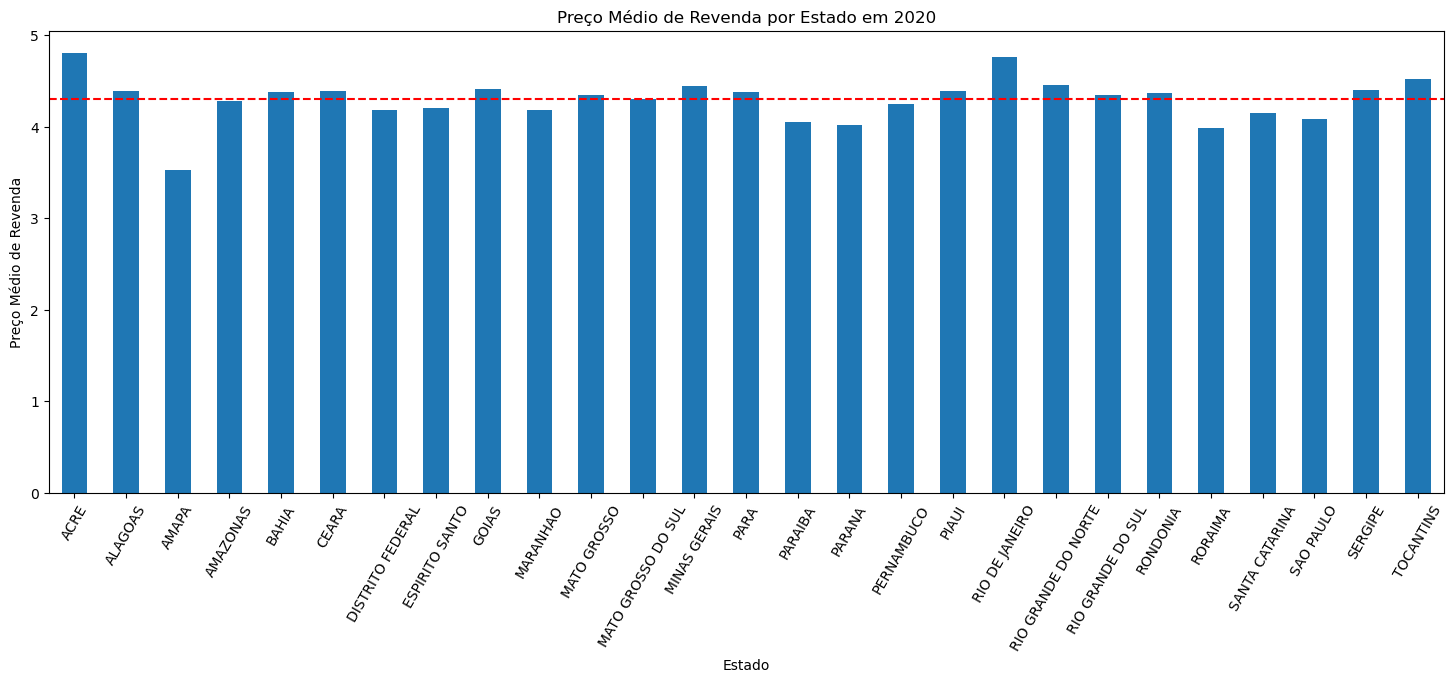

In [60]:
plt.figure(figsize=(18, 6))
gas_2020.groupby('ESTADO')['PREÇO MÉDIO REVENDA'].mean().plot(kind='bar')
plt.title("Preço Médio de Revenda por Estado em 2020")
plt.xlabel("Estado")
plt.xticks(rotation=60)
plt.axhline(gas_2020['PREÇO MÉDIO REVENDA'].mean(), linestyle='--', color='r')
plt.ylabel("Preço Médio de Revenda")
plt.show()

Agora, faremos um boxplot para analisar  a distribuição de valores
e procurar por outliers

<Axes: >

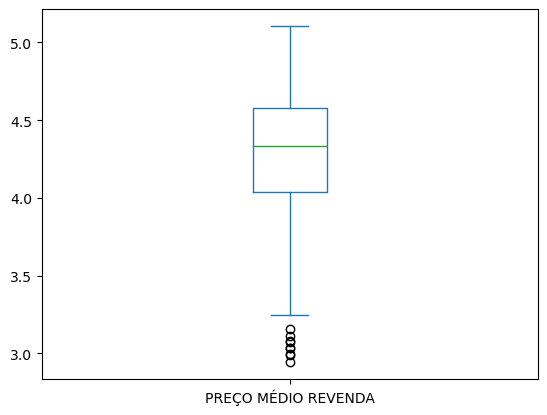

In [64]:
gas_2020['PREÇO MÉDIO REVENDA'].plot(kind='box')

Nota-se a presença de alguns outliers no intervalo inferior, indicando
que alguns estados possuem (ou possuíram) preços bem menores que a média.

Para melhor visualização, faremos um displot destacando a média

/home/luanfabiomg/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


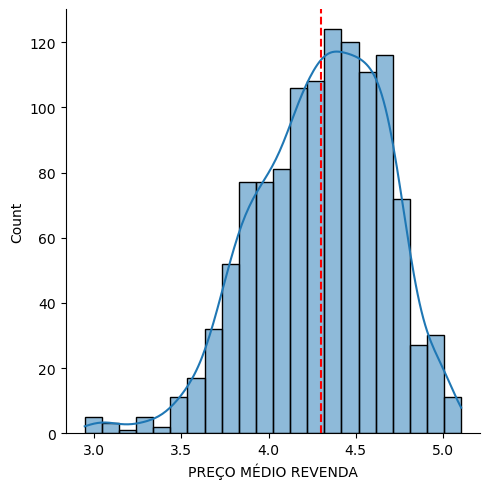

In [70]:
sns.displot(gas_2020['PREÇO MÉDIO REVENDA'], kde=True)
plt.axvline(gas_2020['PREÇO MÉDIO REVENDA'].mean(), linestyle='--', color='r')

Por fim, calcularemos a correlação de Pearson entre os preços médios de revenda da gasolina 
e do etanol em 2020

In [85]:
gasolina = data[(data['PRODUTO'] == 'GASOLINA COMUM') & (data['DATA FINAL'].dt.year == 2020)]
etanol = data[(data['PRODUTO'] == 'ETANOL HIDRATADO') & (data['DATA FINAL'].dt.year == 2020)]

# Remover valores ausentes e redefinir índice para alinhar as séries
gasolina = gasolina['PREÇO MÉDIO REVENDA'].dropna().reset_index(drop=True)
etanol = etanol['PREÇO MÉDIO REVENDA'].dropna().reset_index(drop=True)

# Calcular a correlação de Pearson
gasolina.corr(etanol, method='pearson')

0.24499358477621475

Uma correlação de 0,2449 indica uma correlação positiva fraca entre as duas variáveis. Isso significa que há uma tendência de que os valores das duas variáveis aumentem ou diminuam juntos, mas a relação não é muito forte, algo que é esperado, dado que a gasolina e o etanol são combustíveis com origens diferentes, logo, seus preços não devem influenciar um no outro consideravelmente.